In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

boston = pd.read_csv('data/boston.csv')
X = boston.drop('MEDV', axis=1)
y = boston[['MEDV']]

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.2,
                                                   random_state=1234)

In [38]:
# EDA
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,CAT. MEDV
221,0.40771,0.0,6.20,1,0.507,6.164,91.3,3.0480,8,307,17.4,395.24,21.46,0
375,19.60910,0.0,18.10,0,0.671,7.313,97.9,1.3163,24,666,20.2,396.90,13.44,0
450,6.71772,0.0,18.10,0,0.713,6.749,92.6,2.3236,24,666,20.2,0.32,17.44,0
163,1.51902,0.0,19.58,1,0.605,8.375,93.9,2.1620,5,403,14.7,388.45,3.32,1
402,9.59571,0.0,18.10,0,0.693,6.404,100.0,1.6390,24,666,20.2,376.11,20.31,0


<img src="https://wikidocs.net/images/page/49966/1.png">
- 이미지 출처: http://dator.co.kr/?vid=ctg258&mid=textyle&document_srl=1721307

In [39]:
y_train.head()

,MEDV
221,21.7
375,15.0
450,13.4
163,50.0
402,12.1


In [40]:
X_train.info()
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404 entries, 221 to 303
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CRIM       404 non-null    float64
 1   ZN         404 non-null    float64
 2   INDUS      404 non-null    float64
 3   CHAS       404 non-null    int64  
 4   NOX        404 non-null    float64
 5   RM         404 non-null    float64
 6   AGE        404 non-null    float64
 7   DIS        404 non-null    float64
 8   RAD        404 non-null    int64  
 9   TAX        404 non-null    int64  
 10  PTRATIO    404 non-null    float64
 11  B          404 non-null    float64
 12  LSTAT      404 non-null    float64
 13  CAT. MEDV  404 non-null    int64  
dtypes: float64(10), int64(4)
memory usage: 47.3 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 404 entries, 221 to 303
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MEDV    404 non-

In [41]:
X_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,CAT. MEDV
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.423852,10.818069,11.168911,0.071782,0.556195,6.278074,68.979455,3.724405,9.551980,407.712871,18.458911,353.866139,12.768267,0.155941
std,8.197229,23.061649,6.798110,0.258447,0.116187,0.691061,27.692028,1.983793,8.741662,169.344926,2.152993,95.592190,7.170852,0.363249
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,188.000000,12.600000,0.320000,1.730000,0.000000
25%,0.082598,0.000000,5.190000,0.000000,0.453000,5.888000,45.800000,2.110500,4.000000,278.500000,17.400000,374.527500,7.135000,0.000000
50%,0.260420,0.000000,9.690000,0.000000,0.538000,6.198500,77.150000,3.207450,5.000000,330.000000,19.000000,391.880000,11.675000,0.000000
75%,3.694070,3.125000,18.100000,0.000000,0.624000,6.616500,93.900000,5.104475,24.000000,666.000000,20.200000,396.285000,16.605000,0.000000
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.780000,100.000000,10.585700,24.000000,711.000000,22.000000,396.900000,37.970000,1.000000


In [42]:
X_test.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,CAT. MEDV
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,4.364772,13.524510,11.009510,0.058824,0.548755,6.310618,66.972549,4.074823,9.539216,410.313725,18.442157,367.795490,12.196765,0.205882
std,10.055150,24.324577,7.134571,0.236456,0.115022,0.749645,29.979046,2.523548,8.612300,166.106788,2.222408,71.107801,7.038117,0.406342
min,0.010960,0.000000,1.250000,0.000000,0.389000,4.138000,6.000000,1.178100,1.000000,187.000000,13.000000,3.650000,1.980000,0.000000
25%,0.079095,0.000000,4.210000,0.000000,0.438250,5.878250,40.650000,2.050300,4.000000,287.500000,17.000000,377.255000,6.802500,0.000000
50%,0.250895,0.000000,9.900000,0.000000,0.538000,6.235500,78.750000,3.199200,5.000000,335.000000,19.100000,389.780000,10.175000,0.000000
75%,3.438745,20.000000,18.100000,0.000000,0.624000,6.707000,94.550000,5.469050,20.000000,666.000000,20.200000,395.717500,17.835000,0.000000
max,67.920800,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,31.990000,1.000000


<Axes: >

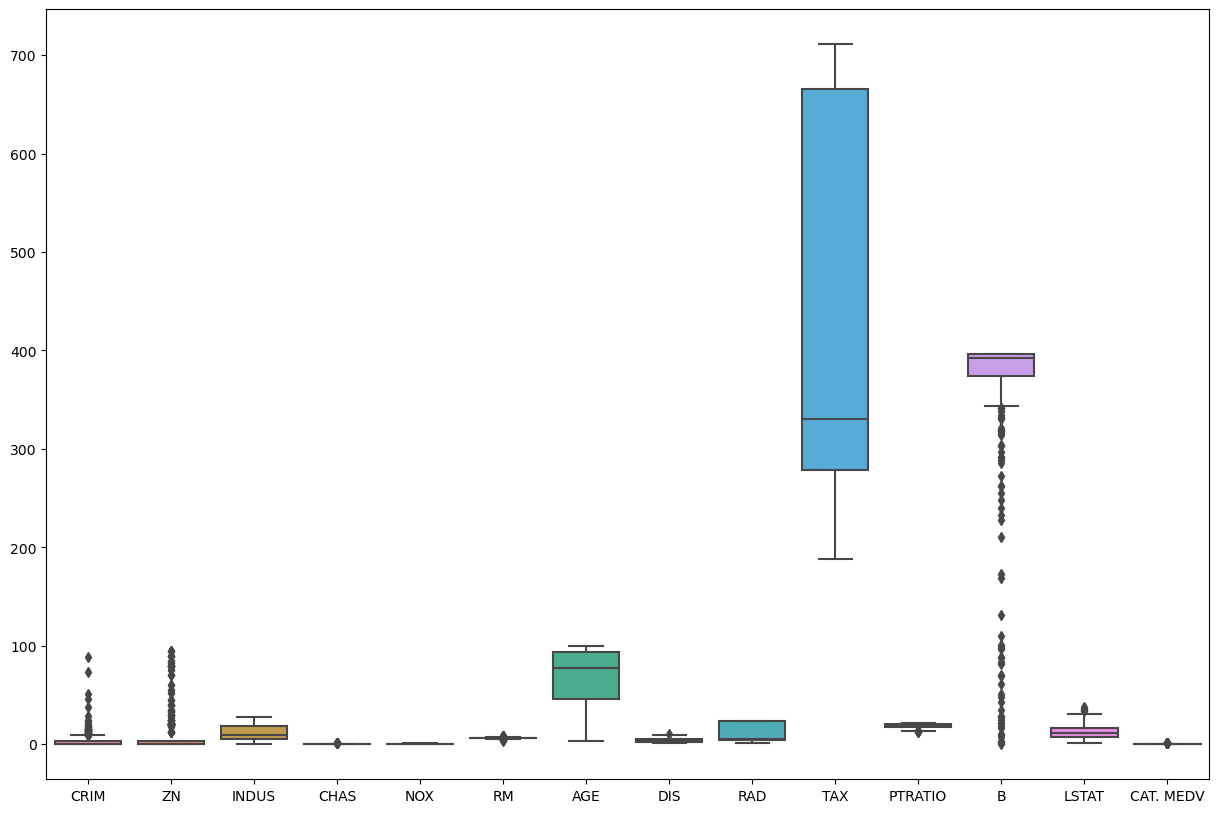

In [45]:
plt.figure(figsize=(15,10))
sns.boxplot(X_train)

<Axes: >

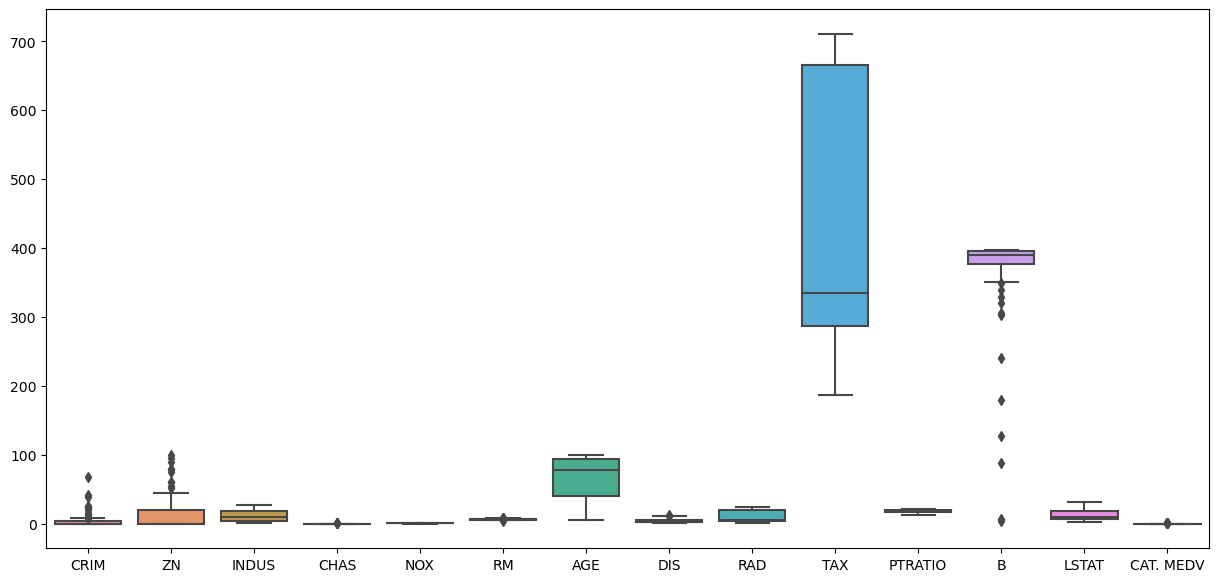

In [46]:
plt.figure(figsize=(15,7))
sns.boxplot(X_test)

In [50]:
# 데이터 전처리
X_train.isnull().sum()

CRIM         0
ZN           0
INDUS        0
CHAS         0
NOX          0
RM           0
AGE          0
DIS          0
RAD          0
TAX          0
PTRATIO      0
B            0
LSTAT        0
CAT. MEDV    0
dtype: int64

In [51]:
X_test.isnull().sum()

CRIM         0
ZN           0
INDUS        0
CHAS         0
NOX          0
RM           0
AGE          0
DIS          0
RAD          0
TAX          0
PTRATIO      0
B            0
LSTAT        0
CAT. MEDV    0
dtype: int64

In [55]:
outlier_features = ['CRIM', 'ZN', 'B']

for feature in outlier_features:
    Q1 = X_train[feature].quantile(.25)
    Q3 = X_train[feature].quantile(.75)
    
    IQR = Q3 - Q1
    
    upper = (Q3 + 1.5*IQR)
    lower = (Q1 - 1.5*IQR)
    
    cond1 = (X_train[feature] > upper)
    cond2 = (X_train[feature] < lower)
    
    M = X_train[~(cond1)][feature].max()
    m = X_train[~(cond2)][feature].min()
    
    X_train[feature] = np.where(cond1, M, X_train[feature])
    X_test[feature] = np.where((X_test[feature] > upper), M, X_test[feature])
    X_train[feature] = np.where(cond2, m, X_train[feature])
    X_test[feature] = np.where((X_test[feature] < lower), m, X_test[feature])

In [56]:
X_train.shape, X_test.shape

((404, 14), (102, 14))

In [57]:
# 분리 데이터 평가

X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train,
                                           test_size=0.2,
                                           random_state=1234)
X_tr.shape, X_val.shape, y_tr.shape, y_val.shape

((323, 14), (81, 14), (323, 1), (81, 1))

In [58]:
reg = LinearRegression()
reg = reg.fit(X_tr, y_tr)
y_pred_val = reg.predict(X_val)

MAE = mean_absolute_error(y_val, y_pred_val)
MSE = mean_squared_error(y_val, y_pred_val)
r2 = r2_score(y_val, y_pred_val)

print(f"평가 MAE : {MAE :.3f}")
print(f"평가 MSE : {MSE :.3f}")
print(f"평가 r2_score : {r2 :.3f}")

평가 MAE : 2.791
평가 MSE : 13.704
평가 r2_score : 0.816


In [59]:
y_pred = reg.predict(X_test)

MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"최종 MAE : {MAE :.3f}")
print(f"최종 MSE : {MSE :.3f}")
print(f"최종 r2_score : {r2 :.3f}")

최종 MAE : 2.839
최종 MSE : 15.114
최종 r2_score : 0.853


In [60]:
reg_positive = LinearRegression(positive=True)
reg_positive = reg.fit(X_tr, y_tr)
pred_positive = reg.predict(X_test)

MAE = mean_absolute_error(y_test, pred_positive)
MSE = mean_squared_error(y_test, pred_positive)
r2 = r2_score(y_test, pred_positive)

print(f"최종 MAE : {MAE :.3f}")
print(f"최종 MSE : {MSE :.3f}")
print(f"최종 r2_score : {r2 :.3f}")

최종 MAE : 2.839
최종 MSE : 15.114
최종 r2_score : 0.853


### 적고싶은 내용 
- numpy와 연관된 선형대수 언어를 알아야 할 듯 싶다.